In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Imports
"""

import os
from dataclasses import dataclass

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Check Data Module

In [10]:
from train import DocDenoiserDataModule
dm = DocDenoiserDataModule()

In [11]:
dm.setup(stage='fit')

22:57:58 | INFO     | Total Dataset       : 144 samples
22:57:58 | INFO     | Train Dataset       : 115 samples
22:57:58 | INFO     | Validation Dataset  : 29 samples


In [12]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [17]:
X_noisy, X = batch
X_noisy.shape, X.shape

(torch.Size([64, 1, 420, 540]), torch.Size([64, 1, 420, 540]))

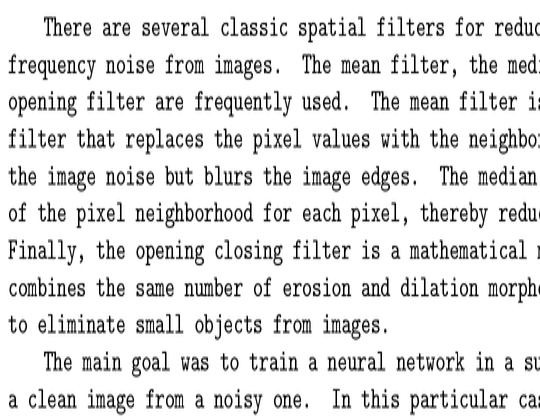

In [18]:
TF.to_pil_image(X[0])

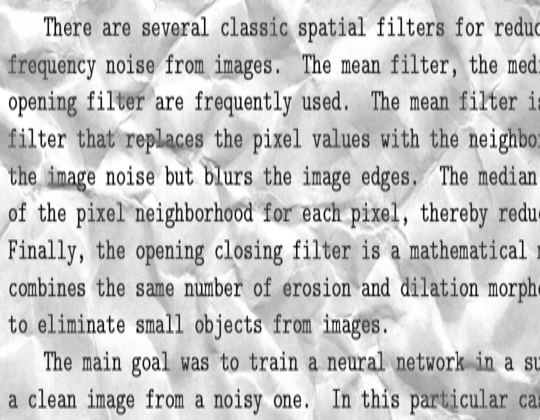

In [19]:
TF.to_pil_image(X_noisy[0])